Import Libraries for data manipulation, modeling, visualization, and feature scaling.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


Dataset Creation

In [19]:
data = {
    'fruit': ['apple', 'banana', 'orange', 'lemon', 'pear', 'apple', 'banana'],
    'weight': [200, 120, 160, 140, 180, 160, 130],
    'color_score': [3, 1, 2, 1, 0, 0, 1],
    'texture_score': [0, 0, 1, 1, 0, 0, 0],
    'sweetness_score': [3, 2, 3, 0, 1, 3, 2]
}
df = pd.DataFrame(data)
print(df.head())  # Shows first 5 rows, covering all fruits


    fruit  weight  color_score  texture_score  sweetness_score
0   apple     200            3              0                3
1  banana     120            1              0                2
2  orange     160            2              1                3
3   lemon     140            1              1                0
4    pear     180            0              0                1


Preprocessing: Convert Fruit names to numbers for the model

In [20]:
le = LabelEncoder()
df['fruit_label'] = le.fit_transform(df['fruit'])
print(df[['fruit', 'fruit_label']].head())  # Shows first 5 rows, covering all fruits


    fruit  fruit_label
0   apple            0
1  banana            1
2  orange            3
3   lemon            2
4    pear            4


Split Data and Train Model: Splits data into training sets and trains the model with scaled features. Scaling ensures covergence, random_state+2 ensures reproducibility.

In [23]:
X = df[['weight', 'color_score', 'texture_score','sweetness_score']]
y = df['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model with scaled data
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

Test and Visualize

Model accuracy: 0.50


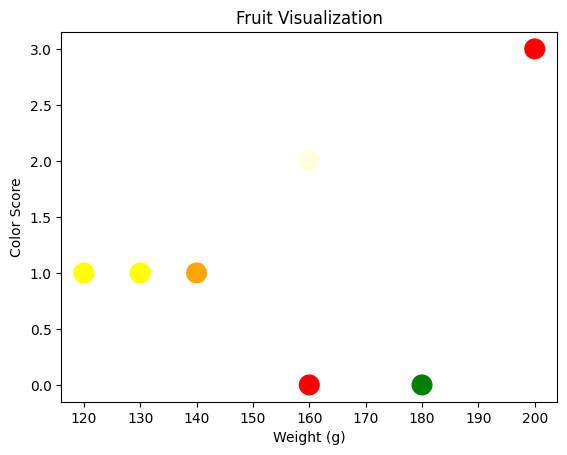

In [24]:
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

# 2D scatter plot for weight and color
colors = {0: 'red', 1: 'yellow', 2: 'orange', 3: 'lightyellow', 4: 'green'}
plt.scatter(df['weight'], df['color_score'], c=df['fruit_label'].map(colors), s=200)
plt.xlabel('Weight (g)')
plt.ylabel('Color Score')
plt.title('Fruit Visualization')
plt.show()


Visualize how much each feature impacts the model's predictions.

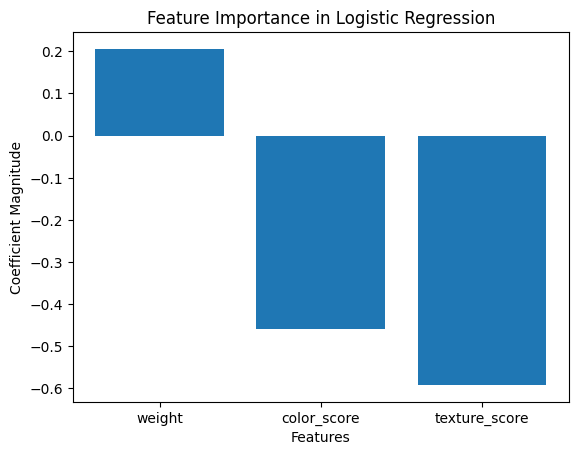

In [6]:
importance = model.coef_[0]
features = ['weight', 'color_score', 'texture_score']
plt.bar(features, importance)
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Feature Importance in Logistic Regression')
plt.show()
